# Discovering Insights from Chess Games

**Primary Objective**: Perform exploratory analysis of chess game data to understand distributions of player skills, outcomes, openings, and basic play patterns before constructing an Elo prediction model.

**Raw Data**: Portable Game Notation (PGN) files containing moves from 25,000 expert chess games, player Elo ratings, openings, and Stockfish evaluations.

**Plan**:
* Compute summary statistics on games: lengths, results, openings, theory depth
* Visualize Elo distributions and correlations
* Sample games across the Elo spectrum and inspect move patterns
* Validate data integrity: correct notation, valid moves, matched results
* Identify anomalies: incomplete games, duplicate matches, odd evaluations

**Learnings**:
* Game length, result, and opening trends for different Elo levels
* Imbalances and biases in player populations or outcomes
* Adherence to opening theory by players of varying skill
* General play patterns and trajectories in games
* Data quality and completeness for modeling
* Peculiar games or moves that require investigation

First, we gotta check out how good the players are, what moves they tend to make, and how their games usually turn out. Once we've got a good sense of all that, we can dive deeper into the data and start figuring out what's really going on. This will help us spot any problems and establish a solid analysis foundation.

### 0. Libraries

In [2]:
from collections import Counter

import chess
import chess.pgn

### 1. Get PGN Chess Data

In [16]:
pgn = open("../data/raw/data.pgn")
game_count = 0
moves_per_game = []

while True:
    game = chess.pgn.read_game(pgn)
    if game is None:
        break
    game_count += 1
    moves_per_game.append(len(list(game.mainline_moves())))

pgn.close()


In [17]:
print(f"The number of games in the file is: {game_count:,d}")

The number of games in the file is: 50,000


### 2. Distribution of Total Moves Per Game

In [18]:
print(f"Average number of moves per game: {sum(moves_per_game)/len(moves_per_game):.2f}")

print(f"Min number of moves per game: {min(moves_per_game):,d}")
print(f"25th percentile of moves per game: {sorted(moves_per_game)[int(len(moves_per_game)*0.25)]:,d}")
print(f"50th percentile of moves per game: {sorted(moves_per_game)[int(len(moves_per_game)*0.50)]:,d}")
print(f"75th percentile of moves per game: {sorted(moves_per_game)[int(len(moves_per_game)*0.75)]:,d}")
print(f"Max number of moves per game: {max(moves_per_game):,d}")

Average number of moves per game: 82.53
Min number of moves per game: 1
25th percentile of moves per game: 60
50th percentile of moves per game: 79
75th percentile of moves per game: 101
Max number of moves per game: 330


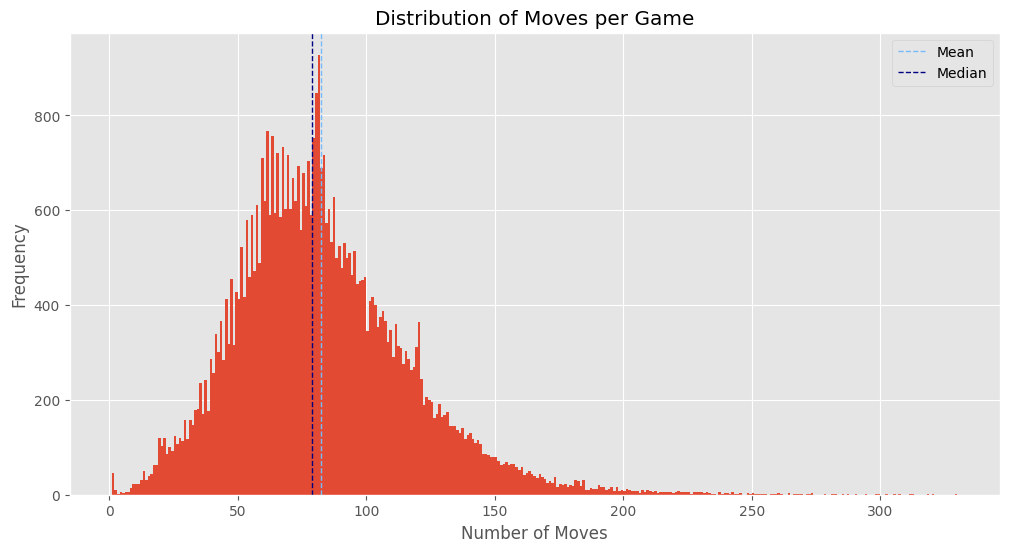

In [26]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [12, 6]
plt.style.use('ggplot')

# Calculate the mean and median of the distribution
mean_moves = np.mean(moves_per_game)
median_moves = np.median(moves_per_game)

# Create a histogram to visualize the distribution of moves per game
plt.hist(moves_per_game, bins=range(min(moves_per_game), max(moves_per_game) + 1))
plt.title("Distribution of Moves per Game")
plt.xlabel("Number of Moves")
plt.ylabel("Frequency")

# Add vertical lines to indicate the mean and median
plt.axvline(mean_moves, color='xkcd:sky blue', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(median_moves, color='navy', linestyle='dashed', linewidth=1, label='Median')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

In [ ]:
print(f"Proportion of games shorter than average: {sum([1 for x in moves_per_game if x < sum(moves_per_game)/len(moves_per_game)]) / len(moves_per_game):.2f}")

Proportion of games shorter than average: 0.56


It appears that the distribution of total moves per game has a peak around 80 moves. This suggests that most of the games in the PGN file have around 100 moves. The range of the x-axis indicates that there are games with as few as 1 moves and as many as 300 moves.

Some interesting insights that can be derived from this distribution include:

- [x] The average length of a game in terms of the number of moves.
- [x] The proportion of games that are shorter or longer than the average game length.
- [ ] The presence of any outliers or unusual patterns in the distribution.

#### 2. 1. Deep Dive into Game Movements Distribution

To investigate the data further, let's ask ourselves questions such as:

- [ ] Are there any patterns or trends in the distribution of moves per game? *To answer this question, you can use visualization techniques such as histograms and box plots to explore the distribution of moves per game. You can also use statistical tests such as the chi-squared test or the Kolmogorov-Smirnov test to determine if the distribution follows a known pattern or if there are any significant differences between groups.*

- [ ] Are there any differences in the distribution of moves per game for different players, openings, or other factors? *To answer this question, you can use regression analysis or analysis of variance (ANOVA) to investigate the relationship between the number of moves per game and other variables such as player skill level, opening choice, or time control. This will help you determine if there are any significant differences in the distribution of moves per game for different groups.*

- [ ] Are there any unusually short or long games, and if so, what might explain these outliers? *To answer this question, you can use descriptive statistics to identify any outliers in the data. You can then use techniques such as cluster analysis or factor analysis to investigate the characteristics of these outliers and determine what might explain their unusual length.*

In [3]:
pgn = open("../data/raw/data.pgn")
board = chess.Board()
white_first_move = []

while True:
    board.reset()
    game = chess.pgn.read_game(pgn)
    
    if game is None: break
    
    for i, move in enumerate(game.mainline_moves()):
        if i > 0: break
        pgn_move = board.variation_san([move])
        if i == 0:
            white_first_move.append(pgn_move)
        board.push(move)

pgn.close()

In [4]:
Counter(white_first_move)

Counter({'1. e4': 22651,
         '1. d4': 17784,
         '1. Nf3': 4882,
         '1. c4': 3534,
         '1. g3': 414,
         '1. b3': 296,
         '1. f4': 206,
         '1. Nc3': 94,
         '1. b4': 66,
         '1. a3': 22,
         '1. e3': 20,
         '1. d3': 14,
         '1. g4': 12,
         '1. c3': 5})

In [5]:
pgn = open("../data/raw/data.pgn")
black_first_move = []

while True:
    board.reset()
    game = chess.pgn.read_game(pgn)
    
    if game is None: break
    
    for i, move in enumerate(game.mainline_moves()):
        if i > 1: break
        pgn_move = board.variation_san([move])
        if i == 1:
            black_first_move.append(pgn_move)
        board.push(move)
        
Counter(black_first_move)

Counter({'1...Nf6': 13954,
         '1...c5': 11207,
         '1...d5': 7438,
         '1...e5': 5741,
         '1...e6': 4300,
         '1...c6': 2290,
         '1...d6': 1900,
         '1...g6': 1843,
         '1...f5': 792,
         '1...b6': 224,
         '1...Nc6': 211,
         '1...b5': 27,
         '1...a6': 17,
         '1...a5': 8,
         '1...Nh6': 1,
         '1...Na6': 1,
         '1...g5': 1})